In [1]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/mouginot/work/helpmetric"))
import cymetrichelper as cyh
import pandahelper as pdh


import cymetric as cym
import pandas as pd
import matplotlib.pyplot as plt
from cymetric import graphs as cgr
from cymetric import timeseries as tm

%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [2]:
db = cym.dbopen("case_1/cascade_recycle.h5")
ev = cym.Evaluator(db=db, write=False)

In [22]:
flow = cyh.MakeFlowGraph("case_1/cascade_recycle.h5")
#flow.body = list(set(flow.body))
#flow.view("flow.png")

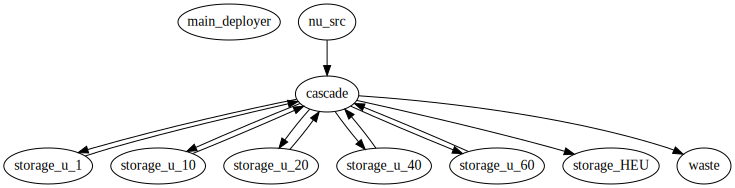

In [23]:
flow

In [3]:
df3_ = tm.transactions(ev, receivers=['storage_tails'], senders=['cascade'], nucs=['238U'])

df3_

,Time,Mass
0,0,0.000000
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,4,0.000000
5,5,39.098499
6,6,39.096163
7,7,39.060484
8,8,39.057645
9,9,39.036042


rec  ['waste'] sender ['cascade']
rec  ['storage_u_1'] sender ['cascade']
rec  ['storage_u_10'] sender ['cascade']
rec  ['storage_u_20'] sender ['cascade']
rec  ['storage_u_40'] sender ['cascade']
rec  ['storage_u_60'] sender ['cascade']
rec  ['storage_HEU'] sender ['cascade']


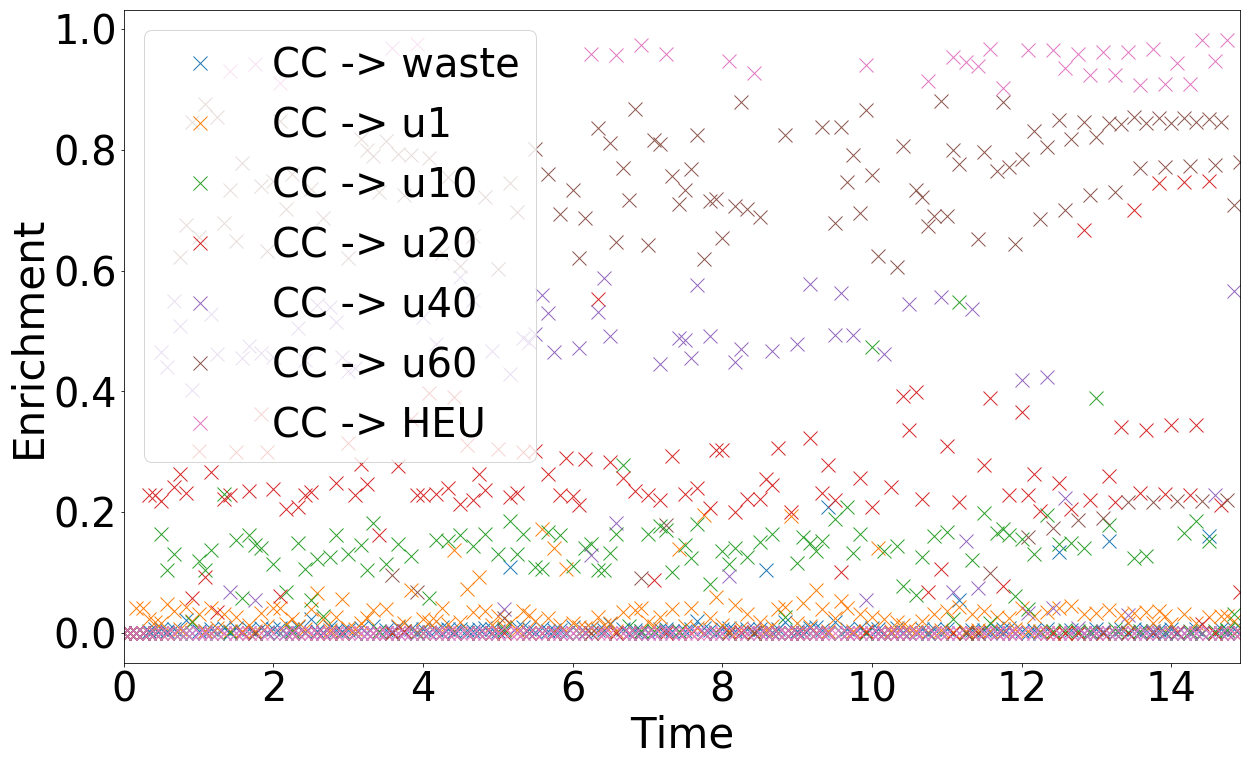

In [24]:
file = "case_1/cascade_recycle.h5"
sender = [['cascade'], 
             ['cascade'], 
             ['cascade'], 
             ['cascade'], 
             ['cascade'], 
             ['cascade'], 
             ['cascade']]
receivers = [['waste'], 
          ['storage_u_1'], 
          ['storage_u_10'], 
          ['storage_u_20'], 
          ['storage_u_40'], 
          ['storage_u_60'], 
          ['storage_HEU']] 
nucs1 = ['238U']
nucs2 = ['235U']
uma_238u = 238050786.996e-6
uma_235u = 235043928.190e-6

c_names = ['CC -> waste',
           'CC -> u1',
           'CC -> u10',
           'CC -> u20',
           'CC -> u40',
           'CC -> u60',
           'CC -> HEU']
labels = c_names

feed_case_2 = [] 
plt_feed_case_2 = []
for i in range(7):
    print("rec ", receivers[i], "sender", sender[i])
    df_ = cyh.TransFrac(file=file, rec=receivers[i], send=sender[i], nucs1=nucs1, nucs2=nucs2,factor1=uma_238u, factor2=uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_['Time'] *= 1/12.
    feed_case_2.append(df_)
    plt_feed_case_2.append( (df_, c_names[i]) )
    
pdh.MakePlot(plt_feed_case_2, "Time", "Enrichment", linestyle="" )
plt.savefig("assays.png")

In [7]:
file = "cascade_case_2_2.sqlite"

feed_case_2_2 = [] 
plt_feed_case_2_2 = []
for i in range(5):
    df_ = cyh.TransFrac(file, receivers[i], sender[i], nucs1, nucs2,uma_238u, uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_['Time'] *= 1/12.
    feed_case_2_2.append(df_)
    plt_feed_case_2_2.append( (df_, c_names[i]) )
    
pdh.MakePlot(plt_feed_case_2_2, "Time", "Feed Enrichment" )
plt.axhline(y=0.9)

ValueError: can not merge DataFrame with instance of type <class 'NoneType'>

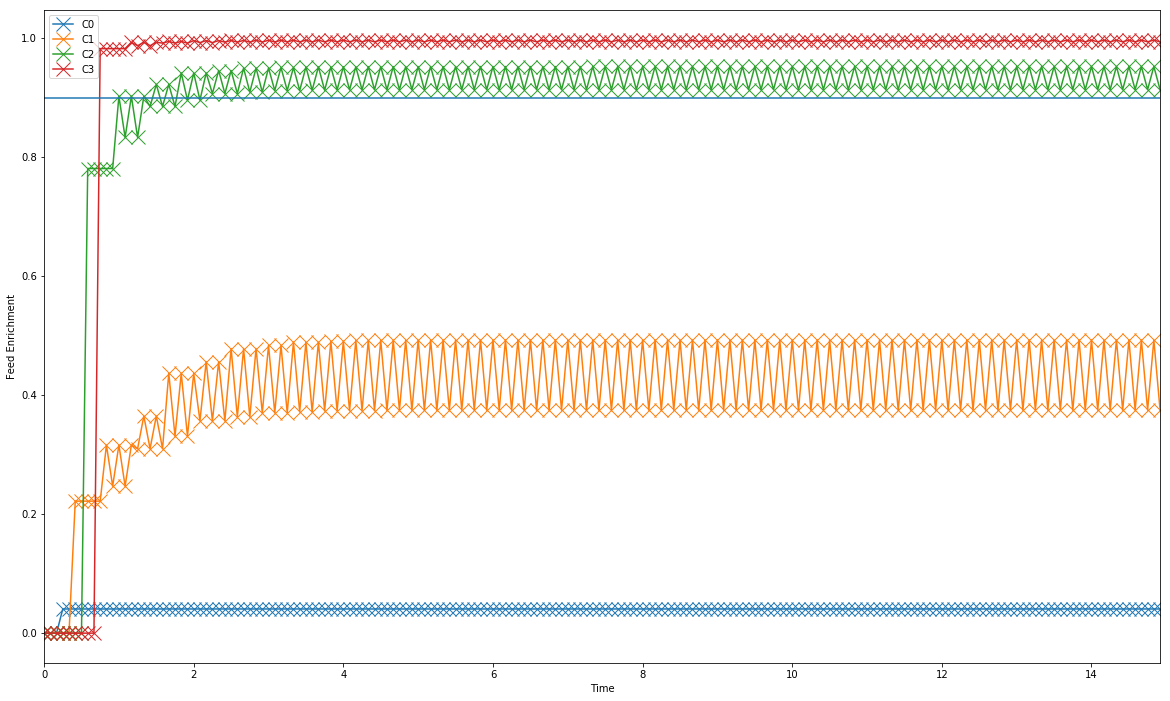

In [6]:
file = "cascade_case_2_3.sqlite"

feed_case_2_3 = [] 
plt_feed_case_2_3 = []
for i in range(4):
    df_ = cyh.TransFrac(file, receivers[i], sender[i], nucs1, nucs2,uma_238u, uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_['Time'] *= 1/12.
    feed_case_2_3.append(df_)
    plt_feed_case_2_3.append( (df_, c_names[i]) )
    
pdh.MakePlot(plt_feed_case_2_3, "Time", "Feed Enrichment" )
plt.axhline(y=0.9)

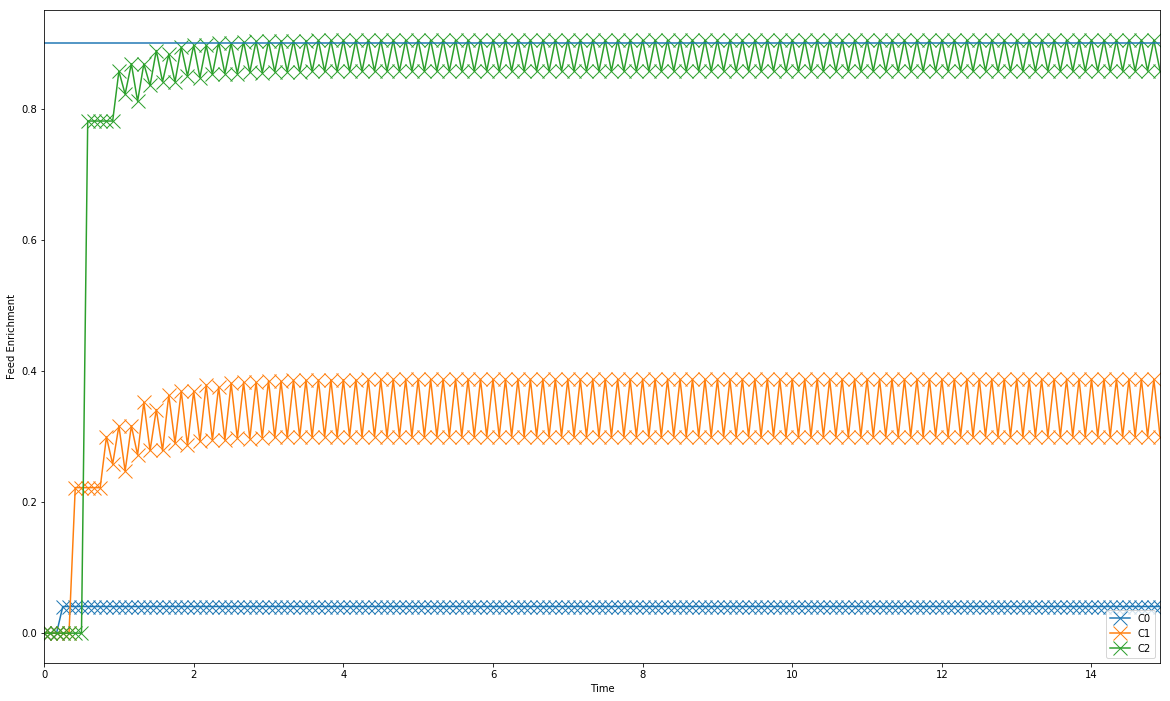

In [7]:
file = "cascade_case_2_4.sqlite"

feed_case_2_4 = [] 
plt_feed_case_2_4 = []
for i in range(3):
    df_ = cyh.TransFrac(file, receivers[i], sender[i], nucs1, nucs2,uma_238u, uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_['Time'] *= 1/12.
    feed_case_2_4.append(df_)
    plt_feed_case_2_4.append( (df_, c_names[i]) )
    
pdh.MakePlot(plt_feed_case_2_4, "Time", "Feed Enrichment" )
plt.axhline(y=0.9)

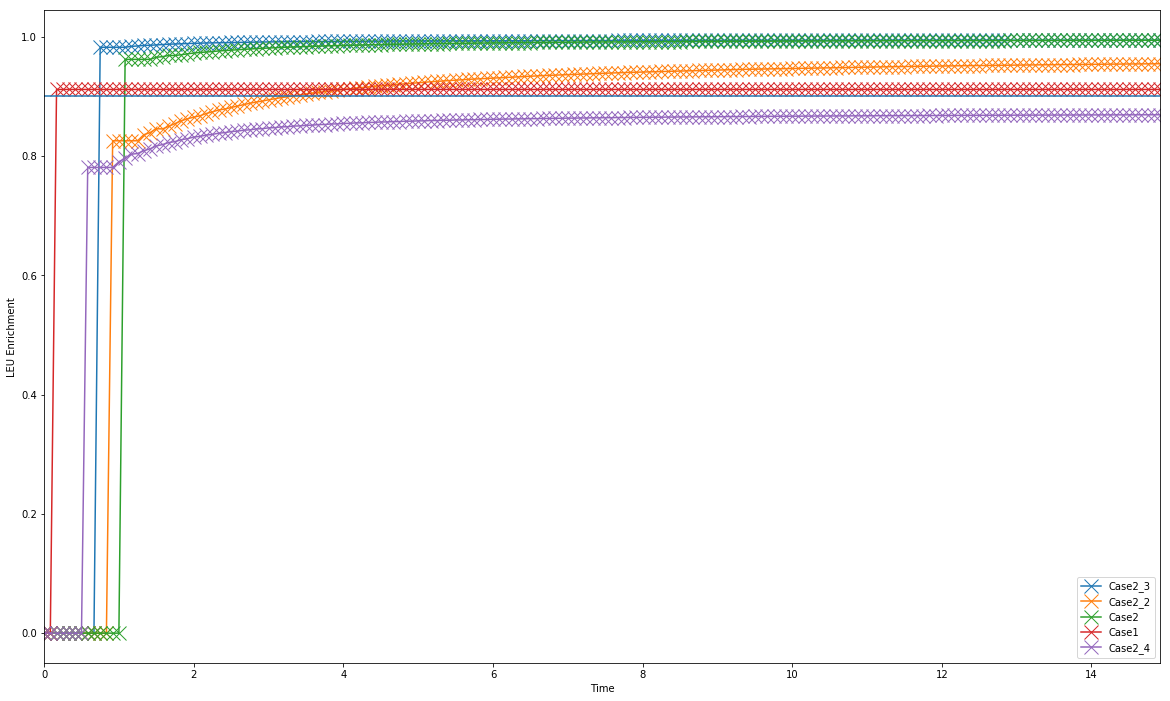

In [8]:
files = ['cascade_case_2_3.sqlite','cascade_case_2_2.sqlite', 'cascade_case_2.sqlite', 'cascade_case_1.sqlite','cascade_case_2_4.sqlite']
invs = ['storage_3', 'storage_4', 'storage_5', 'storage','storage_2']

c_names = ['Case2_3','Case2_2', 'Case2', 'Case1','Case2_4']
LEU_enrich_case_2_x = []
plt_LEU_enrich_case_2_x = []

for i in range(5):
    df_ = cyh.InvFrac(files[i], [invs[i]], nucs1, nucs2, uma_238u, uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_['Time'] *= 1/12.
    LEU_enrich_case_2_x.append(df_)
    plt_LEU_enrich_case_2_x.append( (df_, c_names[i]) )
    
pdh.MakePlot(plt_LEU_enrich_case_2_x, "Time", "LEU Enrichment" )
plt.axhline(y=0.9)

/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/timeseries.py:133: UserWarning: no nuclide provided
  warnings.warn(wng_msg, UserWarning)


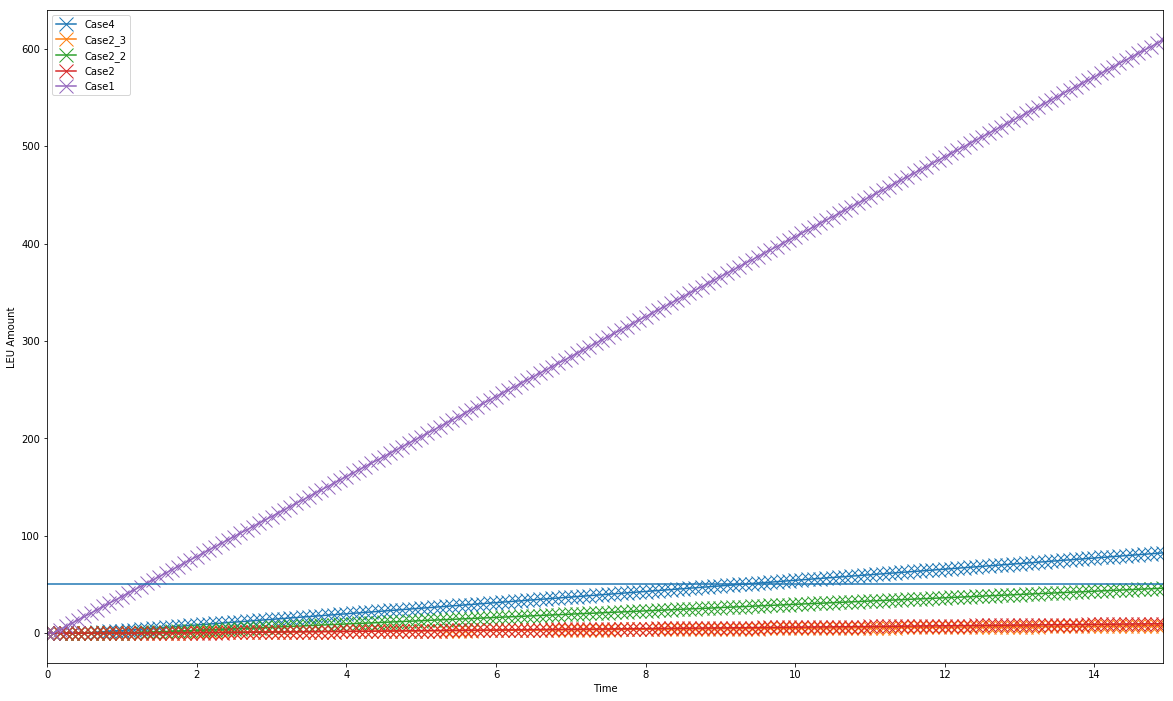

In [9]:
files = ['cascade_case_2_4.sqlite','cascade_case_2_3.sqlite','cascade_case_2_2.sqlite', 'cascade_case_2.sqlite', 'cascade_case_1.sqlite']
invs = ['storage_2','storage_3', 'storage_4', 'storage_5', 'storage']

c_names = ['Case4','Case2_3','Case2_2', 'Case2', 'Case1']

LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []

for i in range(5):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)

    df_ = tm.inventories(ev_, [invs[i]])
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_['Time'] *= 1/12.
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    
pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "LEU Amount" )
plt.axhline(y=50)

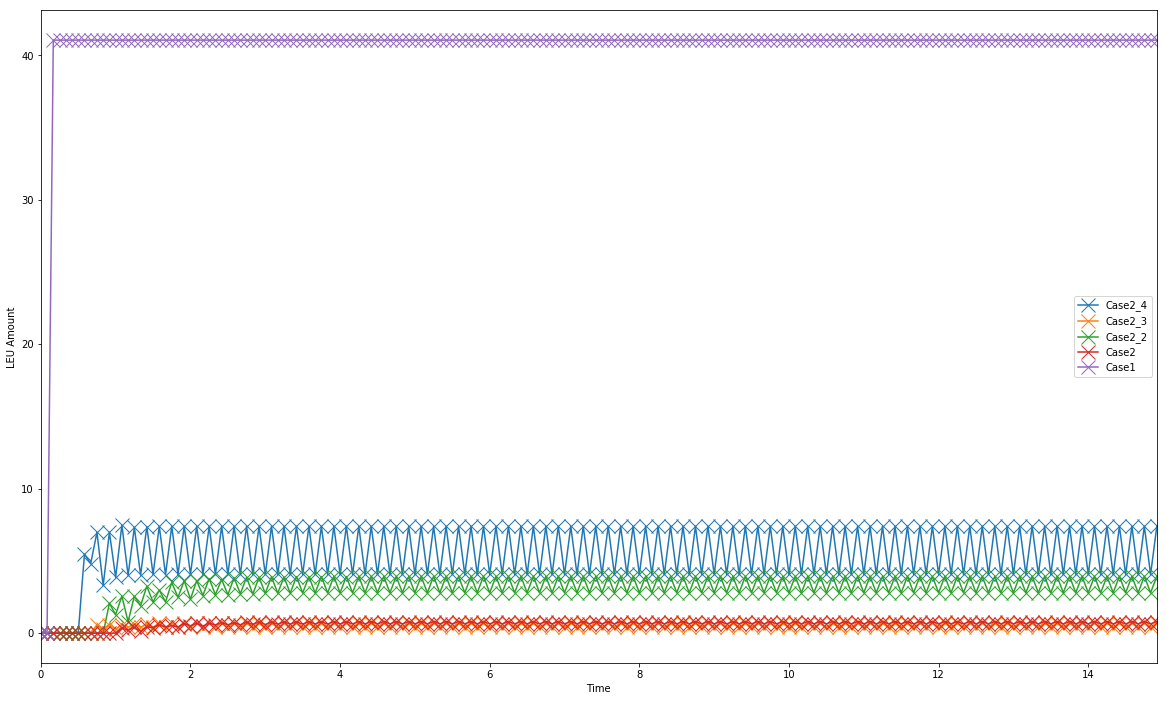

In [10]:
files = ['cascade_case_2_4.sqlite','cascade_case_2_3.sqlite','cascade_case_2_2.sqlite', 'cascade_case_2.sqlite', 'cascade_case_1.sqlite']
invs = ['storage_2','storage_3', 'storage_4', 'storage_5', 'storage']

c_names = ['Case2_4','Case2_3','Case2_2', 'Case2', 'Case1']
LEU_prod_qty_case_2_x = []
plt_LEU_prod_qty_case_2_x = []

for i in range(5):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)

    df_ = tm.transactions(ev_, receivers=[invs[i]])
    df_['Mass'] *= 12.

    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_['Time'] *= 1/12.


    LEU_prod_qty_case_2_x.append(df_)
    plt_LEU_prod_qty_case_2_x.append( (LEU_prod_qty_case_2_x[i], c_names[i]) )
    
pdh.MakePlot(plt_LEU_prod_qty_case_2_x, "Time", "LEU Amount" )


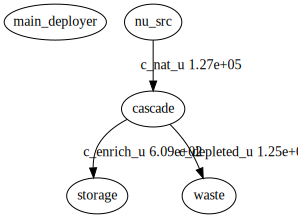

In [11]:
cyh.MakeFlowGraph("cascade_case_1.sqlite")


In [12]:
c_enrich_u 6.09e+02


SyntaxError: invalid syntax (<ipython-input-12-9655348aac87>, line 1)